In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from tqdm import tqdm

## Creación de archivo de ELGs

In [56]:
import fitsio
fits_tru = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_true_mod.fits')
fits_tar = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_tar_mod.fits')

In [57]:
def select_dataset(name_to_select, target_column, true_data, tar_data):
    
    '''
    returns data_set_1 and data-set_2 with only the data corresponding to name_to_select
    '''
    n_rows = len(true_data[1][target_column][:])

    true_array_to_return = []
    tar_array_to_return = []
    for i in tqdm(range(n_rows)):
        name_in_file = true_data[1][target_column][i]
        if name_to_select == name_in_file:
            true_array_to_return.append(true_data[1][i])
            tar_array_to_return.append(tar_data[1][i])
            
    true_array_to_return = array(true_array_to_return)
    tar_array_to_return = array(tar_array_to_return)
    
    return true_array_to_return, tar_array_to_return

In [58]:
true_1, tar_2 = select_dataset(b'ELG       ', 'TEMPLATETYPE', fits_tru, fits_tar)

  3%|▎         | 67106/2131896 [00:16<10:46, 3196.16it/s] 

KeyboardInterrupt: 

In [12]:
len(true_1)

601847

In [59]:
fitsio.write('/home/sd.lobo251/Documents/dc17b/ELG_files/ELG_true_file.fits', true_1)
fitsio.write('/home/sd.lobo251/Documents/dc17b/ELG_files/ELG_tar_file.fits', tar_2)

OSError: FITSIO status = 104: could not open the named file
cannot reopen file READWRITE when previously opened READONLY
/home/sd.lobo251/Documents/dc17b/ELG_files/ELG_true_file.fits


  3%|▎         | 67106/2131896 [00:30<10:46, 3196.16it/s]

### -------------------------------------------------------------------------------------

In [60]:
ELG_true = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/ELG_files/ELG_true_file.fits')
ELG_tar = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/ELG_files/ELG_tar_file.fits')

(0.0, 2.0)

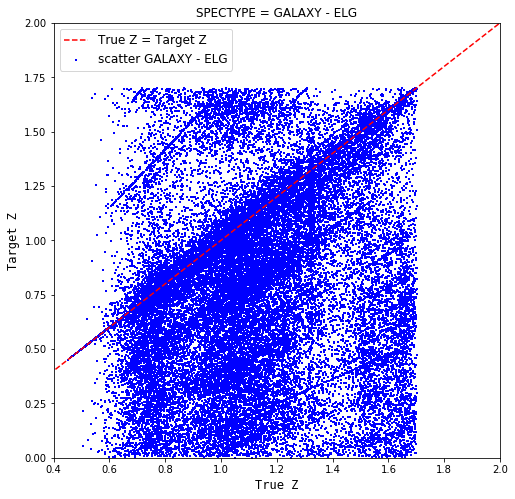

In [61]:
x_f = linspace(0, 4.0, 100)

fig, ax = subplots(figsize=(8, 8))
ax.plot(x_f, x_f, '--', color='r')
ax.scatter( ELG_true[1]['TRUEZ'][:], ELG_tar[1]['Z'][:], marker='+', s =4, c='b')
ax.legend(('True Z = Target Z', 'scatter GALAXY - ELG'),  fontsize=12)
ax.set_xlabel('True Z',  fontsize=12, fontname='monospace')
ax.set_ylabel('Target Z',  fontsize=12, fontname='monospace')
ax.set_title('SPECTYPE = GALAXY - ELG',  fontsize=12)
ax.set_xlim(0.4, 2.0)
ax.set_ylim(0.0, 2.0)


In [62]:
alpha = ELG_true[1]['TRUEZ'][:]/ELG_tar[1]['Z'][:]
alpha_sign = alpha>0

from numpy.lib.recfunctions import append_fields
fluxes = ELG_tar[1]['TARGETID','FLUX_G', 'FLUX_R', 'FLUX_Z', \
                                  'FLUX_W1', 'FLUX_W2', 'MW_TRANSMISSION_G', \
                                 'MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z', \
                                 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2','Z'][:]
fluxes = append_fields(fluxes, 'TRUEZ', ELG_true[1]['TRUEZ'][:], usemask=False)
fluxes = append_fields(fluxes, 'alpha', alpha, usemask=False)

#correcion de alphas y flujos, se eliminan todos con signos negativos

fluxG_sign = ELG_tar[1]['FLUX_G'][:] >0
fluxR_sign = ELG_tar[1]['FLUX_R'][:] >0
fluxZ_sign = ELG_tar[1]['FLUX_Z'][:] >0
fluxW1_sign = ELG_tar[1]['FLUX_W1'][:] >0
fluxW2_sign = ELG_tar[1]['FLUX_W2'][:] >0



#Se eliminan los alphas negativos. 
print('len before purge: ', shape(fluxes))
fluxes = fluxes[alpha_sign]
alpha = alpha[alpha_sign]

fluxG_sign = fluxG_sign[alpha_sign]
fluxR_sign = fluxR_sign[alpha_sign]
fluxZ_sign = fluxZ_sign[alpha_sign]
fluxW1_sign = fluxW1_sign[alpha_sign]
fluxW2_sign = fluxW2_sign[alpha_sign]

fluxes = fluxes[fluxG_sign]
alpha = alpha[fluxG_sign]

fluxR_sign = fluxR_sign[fluxG_sign]
fluxZ_sign = fluxZ_sign[fluxG_sign]
fluxW1_sign = fluxW1_sign[fluxG_sign]
fluxW2_sign = fluxW2_sign[fluxG_sign]

fluxes = fluxes[fluxR_sign]
alpha = alpha[fluxR_sign]

fluxZ_sign = fluxZ_sign[fluxR_sign]
fluxW1_sign = fluxW1_sign[fluxR_sign]
fluxW2_sign = fluxW2_sign[fluxR_sign]

fluxes = fluxes[fluxZ_sign]
alpha = alpha[fluxZ_sign]

fluxW1_sign = fluxW1_sign[fluxZ_sign]
fluxW2_sign = fluxW2_sign[fluxZ_sign]

fluxes = fluxes[fluxW1_sign]
alpha = alpha[fluxW1_sign]

fluxW2_sign = fluxW2_sign[fluxW1_sign]

fluxes = fluxes[fluxW2_sign]
alpha = alpha[fluxW2_sign]



print('len after purge: ', shape(fluxes))

fluxes[0:2][['FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2',  'Z', 'TRUEZ' ]]

len before purge:  (601847,)
len after purge:  (586782,)


array([(1.4033872, 2.0614164, 2.8548417, 2.227333, 2.0792072, 0.68364701, 0.6836959 ),
       (0.522865 , 0.8083981, 1.7645402, 2.078096, 1.1338233, 0.87383473, 0.87384486)],
      dtype=[('FLUX_G', '>f4'), ('FLUX_R', '>f4'), ('FLUX_Z', '>f4'), ('FLUX_W1', '>f4'), ('FLUX_W2', '>f4'), ('Z', '>f8'), ('TRUEZ', '>f4')])

In [63]:
flux_names = ['FLUX_G', 'FLUX_R', 'FLUX_Z',  'FLUX_W1', 'FLUX_W2']
# rango de datos de las variables FLUX
for name in flux_names:
    print('Rango de {:8}: {:5.2f} - {:9.2f}'.format(name, min(fluxes[name]), max(fluxes[name])))
    
print()
#changing flux por log(flux)
for name in flux_names:
    fluxes[name] = log10(fluxes[name])
# rango de datos de las variables log(FLUX)
for name in flux_names:
    print('Rango LOG de {:8}: {:5.2f} - {:4.2f}'.format(name, min(fluxes[name]), max(fluxes[name])))

Rango de FLUX_G  :  0.24 - 2139487.75
Rango de FLUX_R  :  0.44 - 2061567.25
Rango de FLUX_Z  :  0.58 - 3455765.50
Rango de FLUX_W1 :  0.00 - 6267678.00
Rango de FLUX_W2 :  0.00 - 5990497.00

Rango LOG de FLUX_G  : -0.63 - 6.33
Rango LOG de FLUX_R  : -0.36 - 6.31
Rango LOG de FLUX_Z  : -0.24 - 6.54
Rango LOG de FLUX_W1 : -4.62 - 6.80
Rango LOG de FLUX_W2 : -4.52 - 6.78


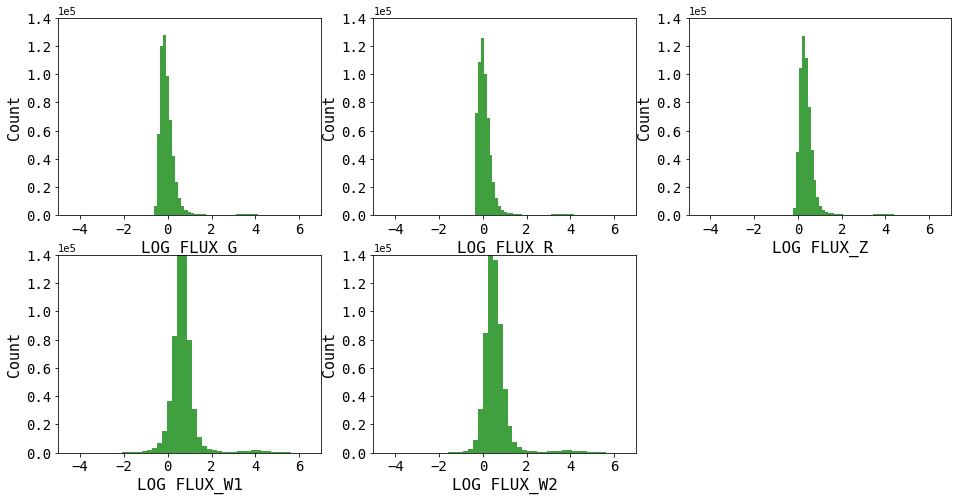

In [64]:
figure(figsize=(16,8))
for i, name in enumerate(flux_names):
    subplot(2,3,1+i)
    n, bins, patches = hist(fluxes[name], 50, density=False, facecolor='g', alpha=0.75)
    plt.axis([-5, 7, 0, 1.4e5])
    xlabel('LOG {}'.format(name),   fontsize=16, fontname='monospace')
    ylabel('Count',  fontsize=15, fontname='monospace')
    xticks(fontsize=14, fontname='monospace')
    yticks(fontsize=14, fontname='monospace')
    ticklabel_format(axis='y', style='sci', scilimits=(-2,3), fontsize=14,)

In [30]:
from sklearn.externals import joblib
krr_model_0 = joblib.load('krr_model-100000.480195.clustermaster.uniandes.edu.co/krr_model_0.pkl')
krr_model_1 = joblib.load('krr_model-100000.480195.clustermaster.uniandes.edu.co/krr_model_1.pkl')
krr_model_2 = joblib.load('krr_model-100000.480195.clustermaster.uniandes.edu.co/krr_model_2.pkl')

In [50]:
import importlib
import krr_grid_search_modelo as kr
importlib.reload(kr)

true_data_path = '/home/sd.lobo251/Documents/dc17b/ELG_files/ELG_true_file.fits'
tar_data_path = '/home/sd.lobo251/Documents/dc17b/ELG_files/ELG_tar_file.fits'
fluxes = kr.import_data(true_data_path, tar_data_path)
flux_names = ['FLUX_G', 'FLUX_R', 'FLUX_Z',  'FLUX_W1', 'FLUX_W2']
for name in flux_names:
    fluxes[name] = log10(fluxes[name])
fluxes['alpha'] = log10(fluxes['alpha'])
fluxes = fluxes[:50000]
X_train, X_test, y_train, y_test, Z_tar_train, Z_tar_test = kr.train_test_data(test_size=0.9, fluxes_array=fluxes, n_datos=len(fluxes), r_state= 0)


In [51]:
shape(X_test)

(45000, 6)

In [52]:
X_train, X_test = kr.Standard_scale_data(X_train, X_test)

In [53]:
print('Predicting with model 0 \n')
y_pred_0 = krr_model_0.predict(X_test)
print('Predicting with model 1 \n')
y_pred_1 = krr_model_1.predict(X_test)
print('Predicting with model 2 \n')
y_pred_2 = krr_model_2.predict(X_test)
print('prediction finished')

Predicting with model 0 

Predicting with model 1 

Predicting with model 2 

prediction finished


In [55]:
from sklearn.metrics import r2_score

print(r'Model 0 $r^2 = ${:.4f}'.format(r2_score(y_test, y_pred_0)))
print(r'Model 1 $r^2 = ${:.4f}'.format(r2_score(y_test, y_pred_1)))
print(r'Model 2 $r^2 = ${:.4f}'.format(r2_score(y_test, y_pred_2)))

Model 0 $r^2 = $-11.9929
Model 1 $r^2 = $-12.1011
Model 2 $r^2 = $-11.9846


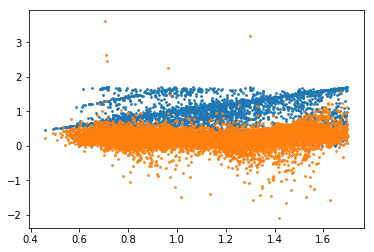

In [71]:
scatter(y_test, Z_tar_test, s=3)
scatter(y_test, y_pred_0, s=3)